<a href="https://colab.research.google.com/github/DSFay/Modeling-II-Machine-Learning/blob/main/EDA_and_model_fitting_ML%20final%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please note that both group members, Lan Ma and Faelynn Carroll, have contributed significantly, and approximately equally, to the submitted work.

## Exploratory data analysis and visualization

In [4]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [11]:
df_final = pd.read_csv('../data/conflict_enso_ml_df_final.csv')

<AxesSubplot:>

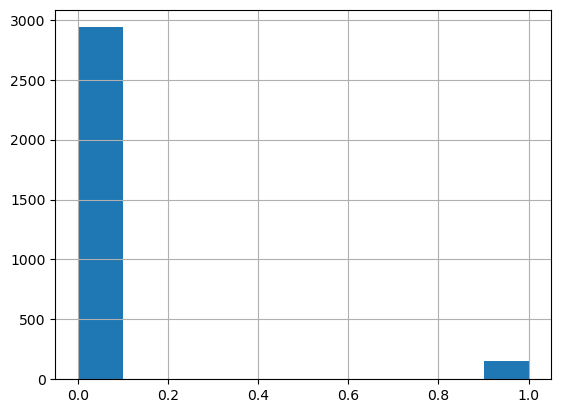

In [12]:
df_final.Onset1.hist()

In [13]:
# That is a super imbalanced dataset. 4.92% '1' (presence of conflict onset) and 95.08% '0' in the dataset
df_final.Onset1.sum()/len(df_final.Onset1)

0.04919093851132686

### Splitting the data into teleconnected and weakly affected areas 

#### Create the teleconnected data set using positive temperature teleconnections to define teleconencted
This is a simplifying assumption that incorporates about 59% of countries which is the largest representative group out of all the teleconnection types. Keeping the other teleconnection types will allow their role to be analyzed by the models.

In [22]:
# Create the teleconnected data set using positive temperature teleconnections to define teleconencted
df_final_teleconnected = df_final[df_final['temp_pos']==1].drop(columns={'enso_region'})
df_final_teleconnected.head(10)                                           

,Country,Year,Direct N2O,Indirect N2O,CH4,CO2eq & AR5,CO2,Area harvested,Production,Yield,Stocks,Milk Animals,Meat Animals,Onset1,Anomaly,pop_count,precip_pos,precip_neg,temp_pos,temp_neg
84,Angola,1990,3.144133,311.252433,5153.75257,11266.163600,0.763067,83530.305556,318221.0,288254.545455,121832.586207,1.040686e+06,42929.744186,0,0.319167,1.528025e+07,0.0,0.0,1.0,0.0
85,Angola,1991,3.197933,311.931913,5153.19568,11284.072112,0.774667,93968.972222,315000.0,291172.727273,130943.741379,1.054795e+06,42657.069767,1,0.641667,1.528025e+07,0.0,0.0,1.0,0.0
86,Angola,1992,3.267467,312.724340,5147.66432,11304.070160,0.792733,102134.861111,320000.0,289000.000000,139312.034483,1.075282e+06,41577.000000,0,0.626667,1.528025e+07,0.0,0.0,1.0,0.0
87,Angola,1993,3.162733,311.745567,5148.73957,11276.022564,0.766856,111352.138889,310000.0,280927.272727,134282.500000,1.050755e+06,41810.046512,0,0.323333,1.528025e+07,0.0,0.0,1.0,0.0
88,Angola,1994,3.079133,312.103527,5157.60095,11274.560232,0.746867,104995.166667,300000.0,272836.363636,156153.448276,1.021677e+06,45341.418605,1,0.480000,1.528025e+07,0.0,0.0,1.0,0.0
89,Angola,1995,3.059189,310.831640,5155.25156,11249.258612,0.742867,94721.138889,287517.0,274118.181818,163666.862069,1.028973e+06,46412.139535,0,-0.170833,1.528025e+07,0.0,0.0,1.0,0.0
90,Angola,1996,3.357467,375.923547,5152.68904,11771.077220,0.812533,93928.027778,330000.0,297490.909091,169099.155172,1.117909e+06,46190.930233,1,-0.459167,1.528025e+07,0.0,0.0,1.0,0.0
91,Angola,1997,3.587278,354.899220,5150.56426,11288.099996,0.867189,95084.083333,356000.0,317045.454545,161774.465517,1.191023e+06,46208.511628,0,1.170833,1.528025e+07,0.0,0.0,1.0,0.0
92,Angola,1998,3.923989,434.031767,5150.48548,13156.236900,0.945256,104545.611111,390000.0,341418.181818,201546.620690,1.277918e+06,47085.162791,1,-0.055000,1.528025e+07,0.0,0.0,1.0,0.0
93,Angola,1999,3.929789,404.335867,5158.03983,12385.976248,0.951189,99752.611111,353177.0,354345.454545,192781.224138,1.312791e+06,46507.372093,0,-1.224167,1.528025e+07,0.0,0.0,1.0,0.0


In [23]:
df_final.shape

(3090, 21)

In [24]:
df_final_teleconnected.shape

(1830, 20)

In [32]:
df_final_teleconnected.describe()

,Year,Direct N2O,Indirect N2O,CH4,CO2eq & AR5,CO2,Area harvested,Production,Yield,Stocks,Milk Animals,Meat Animals,Onset1,Anomaly,pop_count,precip_pos,precip_neg,temp_pos,temp_neg
count,1830.000000,1830.000000,1830.000000,1.830000e+03,1830.000000,1830.000000,1.830000e+03,1.830000e+03,1.830000e+03,1.830000e+03,1.830000e+03,1830.000000,1830.000000,1830.000000,1.830000e+03,1830.000000,1830.000000,1830.0,1830.000000
mean,2003.486339,16.066202,351.067173,1.797226e+04,16054.253713,4.628346,2.473020e+05,2.065258e+06,1.310256e+06,1.055557e+06,3.833228e+06,73717.066235,0.062295,0.028138,3.953402e+07,0.183607,0.321311,1.0,0.122404
std,8.087451,48.246197,1014.597036,8.947679e+04,50483.651045,13.842458,6.087644e+05,7.345531e+06,3.325385e+06,2.953922e+06,1.007613e+07,38707.025627,0.241757,0.607508,1.473799e+08,0.387269,0.467108,0.0,0.327842
min,1990.000000,0.013067,0.232836,-1.025536e+06,-388604.946910,0.004389,3.427692e+02,1.200000e+03,2.558692e+03,2.971394e+03,6.107375e+03,13890.000000,0.000000,-1.224167,2.141134e+05,0.000000,0.000000,1.0,0.000000
25%,1996.000000,0.550481,10.356386,8.057698e+01,652.651766,0.153843,1.880241e+04,3.900000e+04,7.485017e+04,5.700346e+04,2.015922e+05,39676.035714,0.000000,-0.319167,1.852380e+06,0.000000,0.000000,1.0,0.000000
50%,2003.000000,2.813088,60.435952,2.278777e+03,2988.823557,0.719350,6.362228e+04,2.962647e+05,2.270086e+05,1.886318e+05,7.367511e+05,70903.933442,0.000000,0.087500,7.330203e+06,0.000000,0.000000,1.0,0.000000
75%,2010.750000,8.398575,213.876488,9.093721e+03,11086.326766,2.317281,1.724596e+05,8.547181e+05,7.876543e+05,5.819669e+05,2.504503e+06,100466.681818,0.000000,0.445000,1.597539e+07,0.000000,1.000000,1.0,0.000000
max,2017.000000,362.543356,6852.079400,8.630827e+05,433498.941191,108.800133,4.482032e+06,6.735684e+07,2.150975e+07,2.261823e+07,7.046365e+07,192184.578947,1.000000,1.457500,1.058427e+09,1.000000,1.000000,1.0,1.000000


In [25]:
print('The teleconnected countries represent',(len(df_final_teleconnected)/len(df_final))*100, '% of the data.', 1382-1186,'rows are dropped in the Teleconnected set.')

The teleconnected countries represent 59.22330097087378 % of the data. 196 rows are dropped in the Teleconnected set.


In [27]:
# In the teleconnected countries (presence of conflict onset) is 6.23% higher than in the full dataset

print(df_final_teleconnected.Onset1.sum()/len(df_final_teleconnected.Onset1)*100,'%')

6.229508196721312 %


In [37]:
# creating the weakly affected (wa) group 
df_final_wa = df_final[(df_final['temp_pos']==0) & (df_final['temp_neg']==0)]
df_final_wa.head(10)  

,Country,Year,Direct N2O,Indirect N2O,CH4,CO2eq & AR5,CO2,Area harvested,Production,Yield,...,Milk Animals,Meat Animals,Onset1,Anomaly,enso_region,pop_count,precip_pos,precip_neg,temp_pos,temp_neg
0,Afghanistan,1990,4.235000,71.541693,-704.669233,1732.682591,1.550200,132532.131579,3701409.6,2.515455e+06,...,3.586927e+06,48690.125000,0,0.319167,WA,2.008229e+07,1.0,0.0,0.0,0.0
1,Afghanistan,1991,4.378678,74.769900,-721.623467,1806.471914,1.587400,139308.500000,3880000.0,2.562582e+06,...,3.644364e+06,51587.333333,0,0.641667,WA,2.008229e+07,1.0,0.0,0.0,0.0
2,Afghanistan,1992,4.303800,75.621927,-774.507000,1786.807018,1.556533,134016.789474,3825810.8,2.497091e+06,...,3.594255e+06,51219.166667,0,0.626667,WA,2.008229e+07,1.0,0.0,0.0,0.0
3,Afghanistan,1993,4.365400,76.214220,-778.571300,1804.109005,1.562200,154563.605263,3793815.6,2.497055e+06,...,3.575964e+06,51084.750000,0,0.323333,WA,2.008229e+07,1.0,0.0,0.0,0.0
4,Afghanistan,1994,4.578825,79.041300,-781.506233,1900.753029,1.644825,161374.815789,3959961.2,2.576091e+06,...,3.657764e+06,51285.416667,0,0.480000,WA,2.008229e+07,1.0,0.0,0.0,0.0
5,Afghanistan,1995,4.793563,83.323153,-783.055267,2014.109495,1.711275,157133.947368,4009862.0,2.601345e+06,...,3.740444e+06,51437.958333,0,-0.170833,WA,2.008229e+07,1.0,0.0,0.0,0.0
6,Afghanistan,1996,4.629078,93.856240,-784.813633,2178.043959,1.628389,159221.473684,4248800.0,2.812145e+06,...,3.958527e+06,51532.687500,0,-0.459167,WA,2.008229e+07,1.0,0.0,0.0,0.0
7,Afghanistan,1997,5.123333,102.805860,-786.466633,2421.703286,1.803600,160618.789474,4729600.0,3.104818e+06,...,4.387273e+06,51595.291667,0,1.170833,WA,2.008229e+07,1.0,0.0,0.0,0.0
8,Afghanistan,1998,5.550067,109.594807,-787.198400,2620.322077,1.968133,163873.236842,5130800.0,3.400782e+06,...,4.817041e+06,51824.270833,0,-0.055000,WA,2.008229e+07,1.0,0.0,0.0,0.0
9,Afghanistan,1999,5.991200,119.841100,-788.037300,2881.260586,2.135400,150080.473684,5450800.0,3.694636e+06,...,5.312805e+06,52089.416667,0,-1.224167,WA,2.008229e+07,1.0,0.0,0.0,0.0


In [39]:
df_final_wa.describe()

,Year,Direct N2O,Indirect N2O,CH4,CO2eq & AR5,CO2,Area harvested,Production,Yield,Stocks,Milk Animals,Meat Animals,Onset1,Anomaly,pop_count,precip_pos,precip_neg,temp_pos,temp_neg
count,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1204.000000,1.204000e+03,1.204000e+03,1.204000e+03,1.204000e+03,1.204000e+03,1204.000000,1204.000000,1204.000000,1.204000e+03,1204.000000,1204.0,1204.0,1204.0
mean,2003.500000,21.937253,291.027335,-1105.208267,7856.661260,6.999982,2.324401e+05,2.254136e+06,3.235418e+06,1.201983e+06,4.793433e+06,162158.196720,0.031561,0.026339,5.297803e+07,0.209302,0.0,0.0,0.0
std,8.081104,72.788757,762.474182,22404.943083,18480.309730,22.953538,5.027688e+05,3.408630e+06,9.687124e+06,3.156068e+06,1.060422e+07,149095.487279,0.174902,0.607143,1.950829e+08,0.406980,0.0,0.0,0.0
min,1990.000000,0.087733,0.262679,-237494.113064,-7539.699397,0.024200,1.148750e+02,2.013500e+03,1.704892e+04,3.388759e+03,1.703750e+04,13804.666667,0.000000,-1.224167,2.804553e+05,0.000000,0.0,0.0,0.0
25%,1996.750000,2.222982,33.036119,-2199.504492,590.803126,0.877947,3.267032e+04,3.993319e+05,5.419658e+05,1.450446e+05,7.330145e+05,69702.165421,0.000000,-0.354167,4.484706e+06,0.000000,0.0,0.0,0.0
50%,2003.500000,5.745178,75.268461,153.714500,2045.955518,1.921367,8.482551e+04,1.058936e+06,1.102195e+06,3.859265e+05,1.945582e+06,119986.309259,0.000000,0.064583,9.497100e+06,0.000000,0.0,0.0,0.0
75%,2010.250000,12.047200,224.198789,1341.018350,5386.893364,3.810283,1.843526e+05,2.500000e+06,2.462096e+06,1.129056e+06,4.116935e+06,187127.471739,0.000000,0.359375,3.075272e+07,0.000000,0.0,0.0,0.0
max,2017.000000,548.826467,5800.393244,82471.469585,126472.431888,173.443133,3.628214e+06,2.299086e+07,8.549275e+07,2.751939e+07,7.292634e+07,981692.428571,1.000000,1.457500,1.298601e+09,1.000000,0.0,0.0,0.0


In [38]:
# There are 952 rows/entries in the weakly affected group
df_final_wa.shape

(1204, 21)

In [40]:
# Comparing the share of countries in each group (teleconnected and weakly affected)

number_wa_countries = len(df_final_wa['Country'].value_counts())
number_teleconnected_countries = len(df_final_teleconnected['Country'].value_counts())

print ('There are ',number_wa_countries,' weakly affected countries in our final data set, and ',number_teleconnected_countries,' teleconnected countries.' )
print('The weakly affected countries are',df_final_wa['Country'].unique(),'.')

There are  43  weakly affected countries in our final data set, and  65  teleconnected countries.
The weakly affected countries are ['Afghanistan' 'Albania' 'Algeria' 'Argentina' 'Austria' 'Bangladesh'
 'Bhutan' 'Bulgaria' 'Canada' 'Chile' 'China' 'Denmark' 'Egypt' 'Finland'
 'France' 'Greece' 'Hungary' 'Iceland' 'Iraq' 'Ireland' 'Israel' 'Japan'
 'Jordan' 'Kuwait' 'Lebanon' 'Libya' 'Mongolia' 'Morocco' 'Nepal'
 'Netherlands' 'Norway' 'Pakistan' 'Paraguay' 'Poland' 'Portugal'
 'Saudi Arabia' 'Somalia' 'Spain' 'Sweden' 'Switzerland' 'Tunisia'
 'United Arab Emirates' 'Uruguay'] .


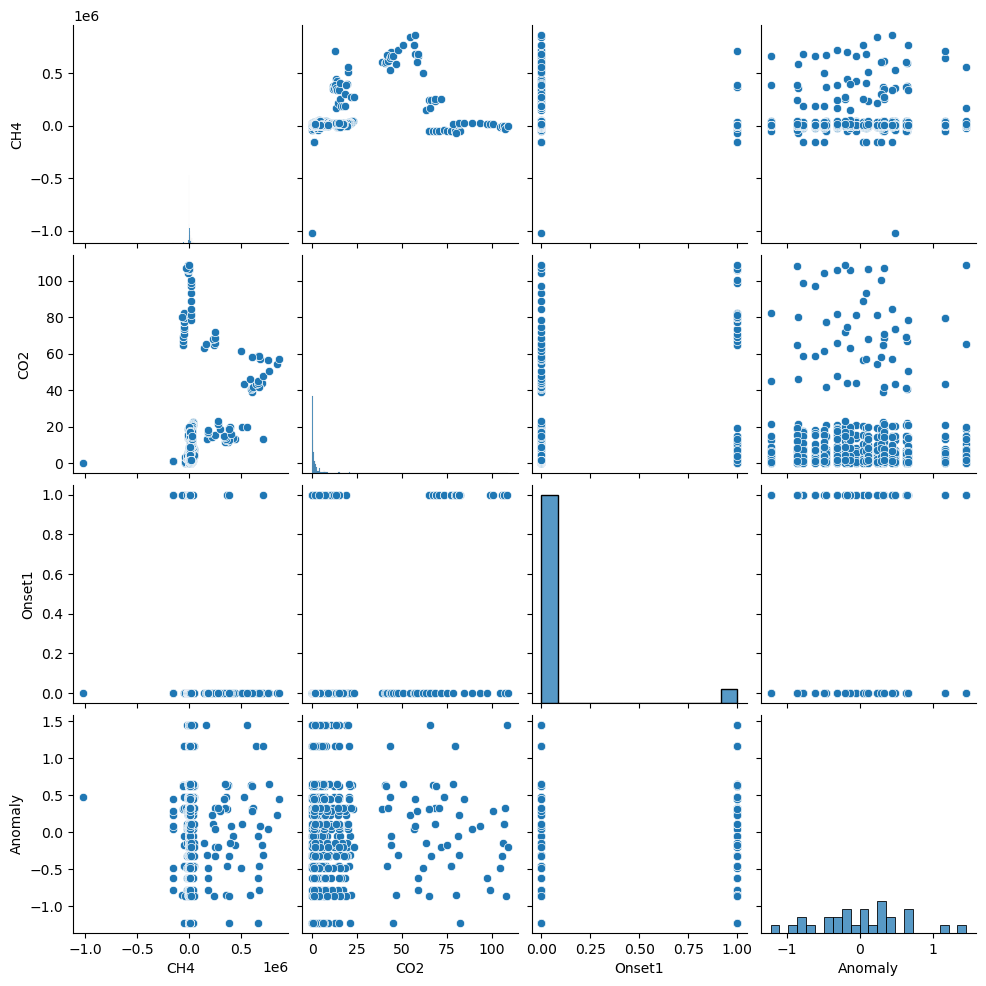

In [41]:
# Taking a look at the distribution between variables in teleconnected countries
    # first visualizing the emissions variables vs Onset1 and Anomaly
    
sns.pairplot(df_final_teleconnected[['CH4','CO2','Onset1','Anomaly']])

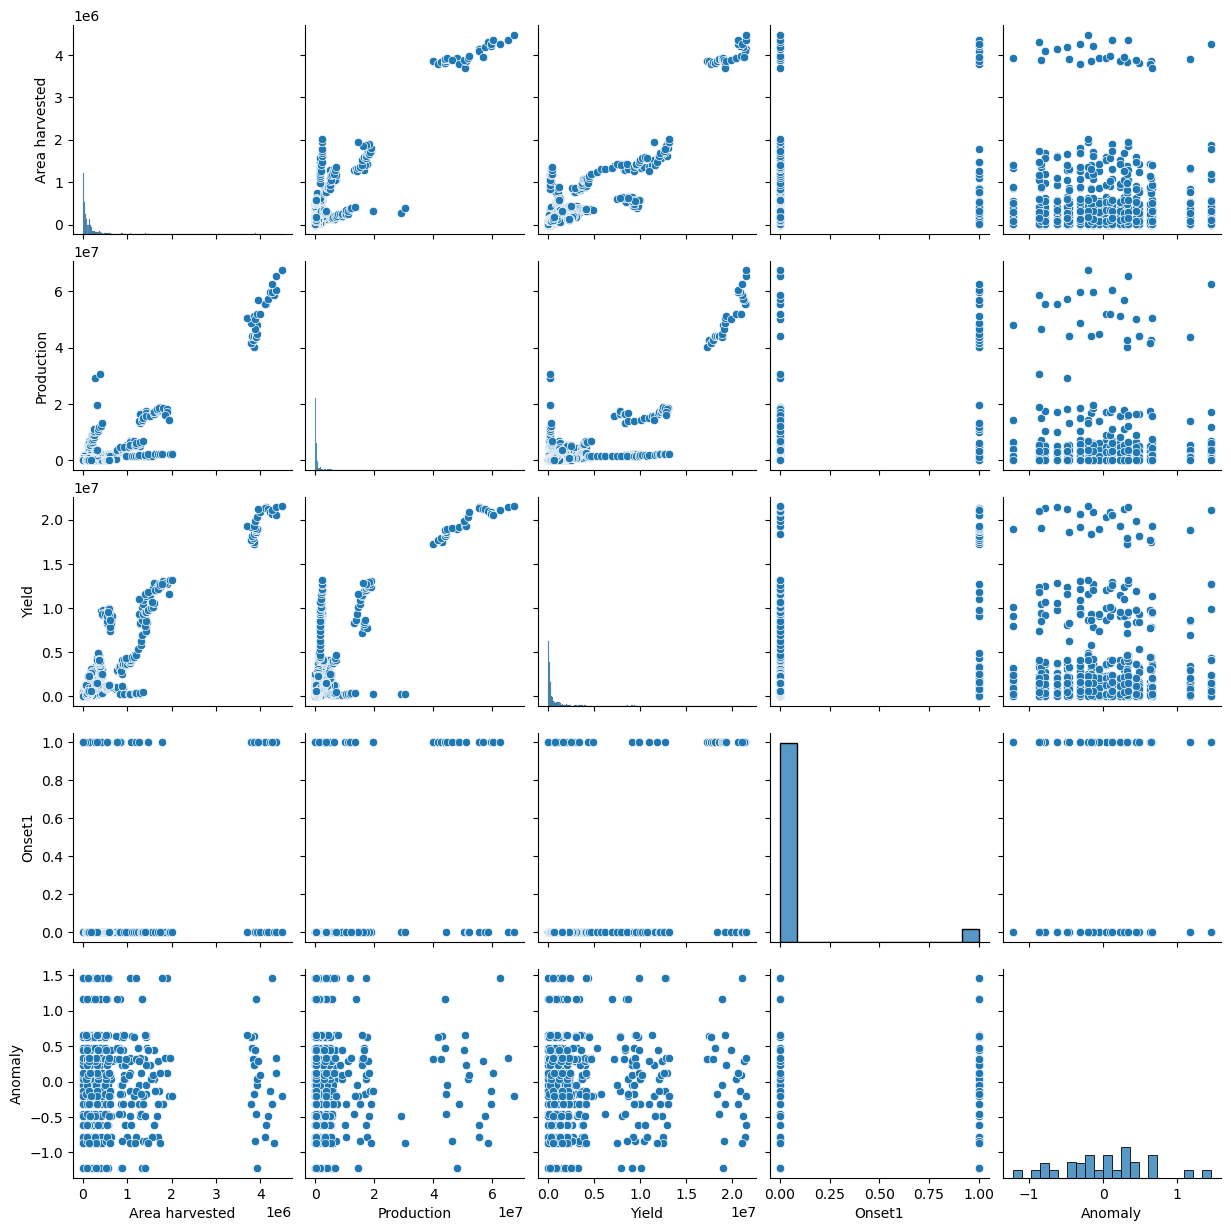

In [42]:
# next the teleconnected group yield variables vs Onset1 and Anomaly

sns.pairplot(df_final_teleconnected[['Area harvested','Production','Yield','Onset1','Anomaly']])

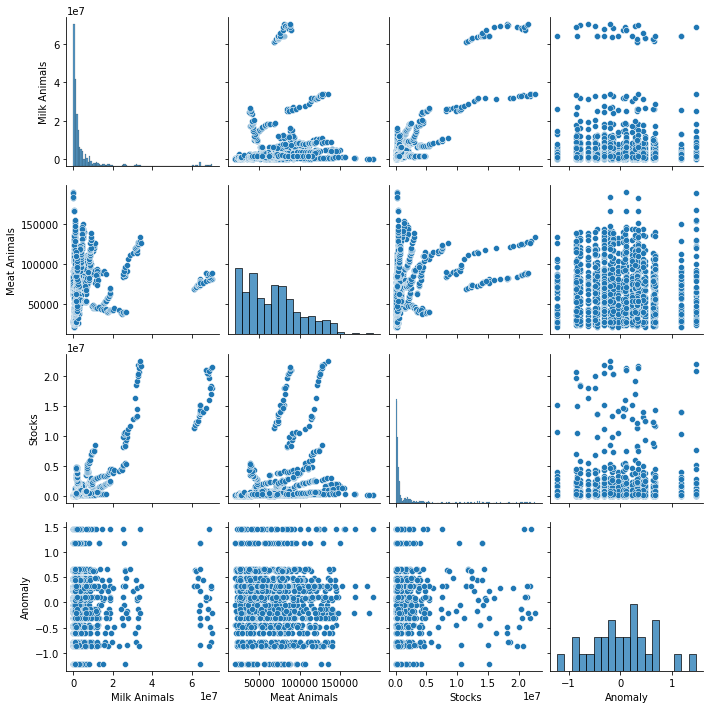

In [ ]:
# visualizing the teleconnected animal production variables vs onset and anomaly

sns.pairplot(df_final_teleconnected[['Milk Animals','Meat Animals','Stocks','Anomaly']])

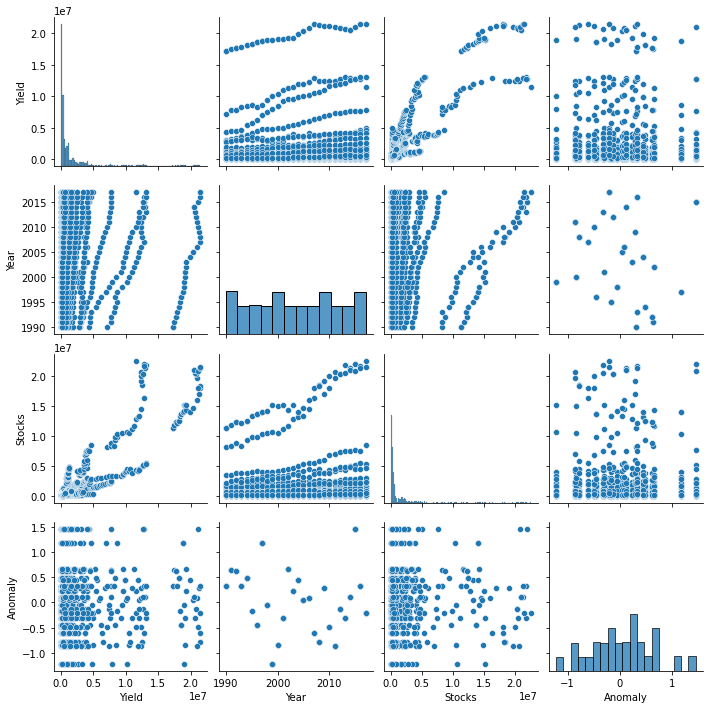

In [ ]:
# taking a look at trends over time

sns.pairplot(df_final_teleconnected[['Yield','Year','Stocks','Anomaly']])

For the above three sets of pair plots, there are clear sub-groups within all six of the input variables. These are likely from different sources of agriculture or emissions. For example, some outlier groups in the 'Production' vs 'Yield' charts are clearly more efficient than the bulk of the data.

Within the anomaly group, there appears to be some bunching of data points around the middle values, which we would expect if we assume that agriculture and human productivity (which emissions is a current proxy variable for) are highest under normal weather conditions. Climate shocks are present in teleconnected areas when 'Anomaly' is equal to or greater than 0.5 and when it's equal to or less than -0.5. We can see clearer bunching between Anomaly values of  -0.5 to 0.5 degrees C (indicating neutral climate conditions). 

In [43]:
#### Splitting the data into two sets to run models with
    # one contains all countries the other just contains teleconnected countries
    # weakly affected countries will not be modeled on alone, since their sample size would be too small

In [47]:
df_final.columns

Index(['Country', 'Year', 'Direct N2O', 'Indirect N2O', 'CH4', 'CO2eq & AR5',
       'CO2', 'Area harvested', 'Production', 'Yield', 'Stocks',
       'Milk Animals', 'Meat Animals', 'Onset1', 'Anomaly', 'enso_region',
       'pop_count', 'precip_pos', 'precip_neg', 'temp_pos', 'temp_neg'],
      dtype='object')

In [64]:
# Creating the model variables including all countries

X = df_final.drop(['Country','Year','Onset1','enso_region'],axis=1)
y = df_final['Onset1']
names = df_final['Country']

In [65]:
# Split the train_test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state= 5)

In [66]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2163, 17), (927, 17), (2163,), (927,))

In [67]:
# Creating the model variables for just teleconnected countries

X_t= df_final_teleconnected.drop(['Country','Year','Onset1'],axis=1)
y_t = df_final_teleconnected['Onset1']

In [68]:
# Split the teleconnected train_test data

X_train_t,X_test_t,y_train_t,y_test_t = train_test_split(X_t ,y_t ,test_size=0.3,random_state= 5)

In [69]:
X_train_t.shape,X_test_t.shape,y_train_t.shape,y_test_t.shape

((1281, 17), (549, 17), (1281,), (549,))

## How many ENSO years are present within the data?

In [70]:
# taking the mean of all months to create a yearly average SST anomaly
nino_year = df_final[['Year','Anomaly']].drop_duplicates()
nino_year.head()

,Year,Anomaly
0,1990,0.319167
1,1991,0.641667
2,1992,0.626667
3,1993,0.323333
4,1994,0.480000


In [71]:
# Our df contains 28 years of ENSO data

len(nino_year['Year'])

28

In [72]:
# Calculating the number of ENSO years present in the df

ENSO = nino_year['Anomaly']

Nina = -0.49
Nino = 0.49

nina_count = len([i for i in ENSO if i < Nina])
nino_count = len([i for i in ENSO if i > Nino])


enso_count = nino_count + nina_count 

    
print(enso_count, ' total ENSO years')
print (nina_count,' La Nina years','& ')
print(nino_count,' El Nino years')

10  total ENSO years
5  La Nina years & 
5  El Nino years


In [73]:
len(df_final.Year.unique())

28

In [89]:
len(df_final.Country.unique())

110

In [90]:
len(df_final_teleconnected.Country.unique())

65

In [91]:
len(df_final_wa.Country.unique())

43

# There are 10 ENSO years out of 28 total years in our data 

Almost half of the dataset: 35.7%% of years are ENSO years. This is a good balance.




## Random Forest Classifier

Random Forest Classifier on full data set - all countries included. n = 110

In [74]:
num_trees = np.linspace(50,500,10)
num_trees

array([ 50., 100., 150., 200., 250., 300., 350., 400., 450., 500.])

In [75]:
oob_res=[]
for trs in num_trees:
    clf = RandomForestClassifier(n_estimators=int(trs),oob_score=True,random_state= 5).fit(X_train, y_train)
    oob_res.append(clf.oob_score_)

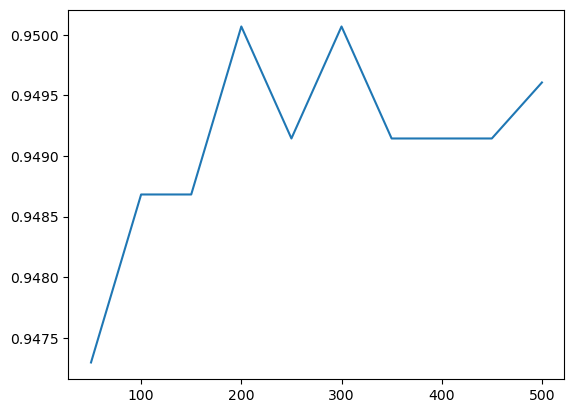

In [76]:
plt.plot(num_trees,oob_res)

In [77]:
np.argmax(oob_res)

3

In [83]:
num_trees[3]

200.0

In [84]:
rf_clf = RandomForestClassifier(n_estimators=200,random_state=5).fit(X_train, y_train)

In [85]:
print(classification_report(y_test,rf_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       886
           1       0.47      0.17      0.25        41

    accuracy                           0.95       927
   macro avg       0.71      0.58      0.61       927
weighted avg       0.94      0.95      0.94       927



In [86]:
pd.crosstab(y_test,rf_clf.predict(X_test),rownames=['True'], colnames=['Predicted'])

Predicted,0,1
True,,
0,878,8
1,34,7


###### f1-score is an average of precision and recall (heavily influenced by the smaller of the two). We hope f1-score higher. That represents the precision and recall are not so bad. 

###### Here we regard 1 as the positive class. f1-score in Random Forest Classifier is 0.94 and the Recall is 0.95, with the conflict onset event prediction scores' f1 being 0.25, precision, 0.47, recall just 0.17. The model isn't doing a great job predicting conflict outbreak since the data is imbalanced.

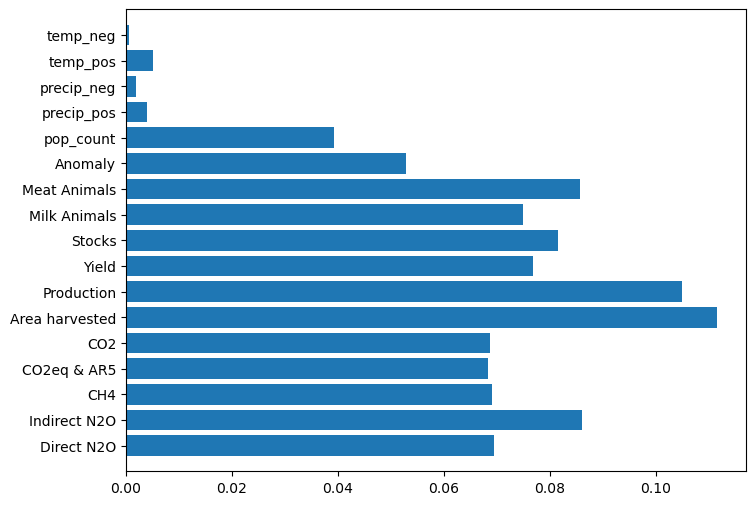

In [88]:
# checking out Feature Importance of our x-variables

plt.figure(figsize=(8,6))
nfeat=X.shape[1]
plt.barh(np.arange(nfeat),rf_clf.feature_importances_,align='center')
plt.yticks(np.arange(nfeat),list(X.columns))
plt.ylim(-1,nfeat)
plt.show()

### Random Forest Classifier on teleconnected group
n = 65

In [182]:
# Create an array of 10 values evenly spaced between 50 and 500, representing the number of trees to use in a random forest model  
num_trees_t = np.linspace(50,500,10)
# Create an empty list to store the out-of-bag scores for each value of num_trees_t
num_trees_t

array([ 50., 100., 150., 200., 250., 300., 350., 400., 450., 500.])

In [93]:
# Loop through each value of num_trees_t, train a random forest model with that many trees, and store the out-of-bag score in oob_res_t
oob_res_t=[]
for trs_t in num_trees_t:
    clf_t = RandomForestClassifier(n_estimators=int(trs_t),oob_score=True,random_state= 5).fit(X_train_t, y_train_t)
    oob_res_t.append(clf_t.oob_score_)

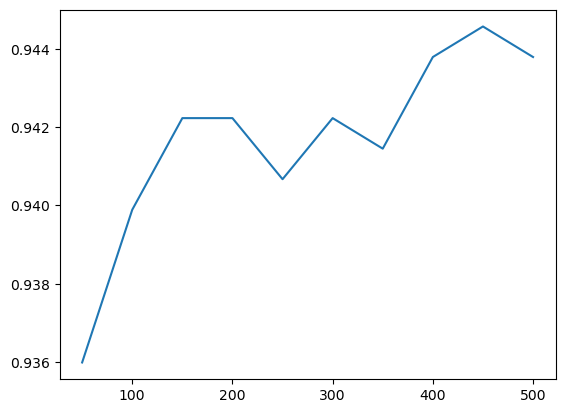

In [183]:
# Create a plot of num_trees_t vs. oob_res_t
plt.plot(num_trees_t,oob_res_t)

In [184]:
np.argmax(oob_res_t)

8

In [185]:
num_trees_t[8]

450.0

In [186]:
rf_clf_t = RandomForestClassifier(n_estimators=450,random_state=5).fit(X_train_t, y_train_t)

In [187]:
print(classification_report(y_test_t,rf_clf_t.predict(X_test_t)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       522
           1       0.20      0.07      0.11        27

    accuracy                           0.94       549
   macro avg       0.58      0.53      0.54       549
weighted avg       0.92      0.94      0.93       549



In [173]:
pd.crosstab(y_test_t,rf_clf_t.predict(X_test_t),rownames=['True'], colnames=['Predicted'])

Predicted,0,1
True,,
0,514,8
1,25,2


###### The teleconnected model performs much worse than the model on the full data set.

Taking a look at feature importance of the x-variables

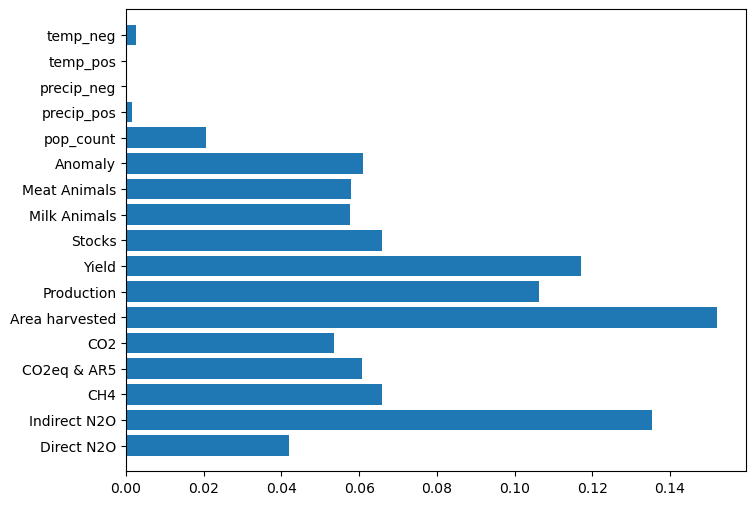

In [101]:
# checking out Feature Importance of our x-variables
plt.figure(figsize=(8,6))
nfeat=X_t.shape[1]
plt.barh(np.arange(nfeat),rf_clf_t.feature_importances_,align='center')
plt.yticks(np.arange(nfeat),list(X.columns))
plt.ylim(-1,nfeat)
plt.show()

It is remarkable that the Anomaly data is not more representative out of the group, since the literature would suggest the opposite. However, the effect of the anomaly is theoretically captured by variables like yield, area harvested, and production which are prevalent here. Indirect N20's role would likely be from production and harvest activites.

## Gradient Boosting Classifier

Starting with the set of all countries: n = 110

In [102]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [178]:
gb_clf = GradientBoostingClassifier(random_state=5).fit(X_train,y_train)

In [179]:
accuracy_score(gb_clf.predict(X_test),y_test)

0.9503775620280475

In [180]:
print(classification_report(y_test,gb_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       886
           1       0.37      0.17      0.23        41

    accuracy                           0.95       927
   macro avg       0.67      0.58      0.60       927
weighted avg       0.94      0.95      0.94       927



In [181]:
pd.crosstab(y_test,gb_clf.predict(X_test),rownames=['True'], colnames=['Predicted'])


Predicted,0,1
True,,
0,874,12
1,34,7


###### Fit on the full data set, the Gradient Boosting Classifier does slightly worse than the Random Forest Classifier (RFC). Recall here is equal to the RFC, but the f1 score is 0.02 points less.

### Gradient Boosting Classifier on teleconnected group
n = 65

In [174]:
gb_clf_t = GradientBoostingClassifier(random_state=5).fit(X_train_t,y_train_t)

In [175]:
accuracy_score(gb_clf_t.predict(X_test_t),y_test_t)

0.9471766848816029

In [176]:
print(classification_report(y_test_t,gb_clf_t.predict(X_test_t)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       522
           1       0.40      0.15      0.22        27

    accuracy                           0.95       549
   macro avg       0.68      0.57      0.59       549
weighted avg       0.93      0.95      0.94       549



In [177]:
pd.crosstab(y_test_t,gb_clf_t.predict(X_test_t),rownames=['True'], colnames=['Predicted'])


Predicted,0,1
True,,
0,516,6
1,23,4


###### We still do not have a great model. The Gradient Boosting Classifier is a large improvement compared to the RFC's performance on the teleconnected countries, but it still struggles to predict conflict outbreak.

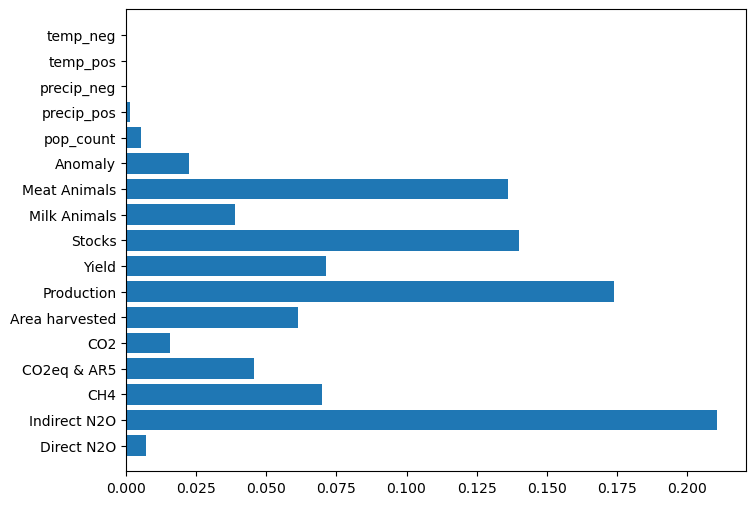

In [109]:
# checking out Feature Importance of our x-variables

plt.figure(figsize=(8,6))
nfeat=X_t.shape[1]
plt.barh(np.arange(nfeat),gb_clf_t.feature_importances_,align='center')
plt.yticks(np.arange(nfeat),list(X_t.columns))
plt.ylim(-1,nfeat)
plt.show()

Indirect N2O, production, stocks, and meat animals levels appear to be responsible for most of the varaition captured by the Gradient Boosting model. Though the model is doing better than the random forest, it is not better than random chance in predicting conflict onset.

## Scaling the data

Starting with the set of all countries: n = 110

In [110]:
# scaling the data
from sklearn.preprocessing import StandardScaler

In [111]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [112]:
X_train_scaled.shape

(2163, 17)

In [113]:
X_train_scaled[0]

array([-0.24097252, -0.26561036,  0.0470447 , -0.13675108, -0.25146428,
       -0.30893298, -0.19339915, -0.28927192, -0.27017388, -0.33524648,
       -0.03477111, -1.06041696, -0.23350756, -0.48797797,  2.06155281,
        0.83295476, -0.32182515])

In [114]:
X.columns

Index(['Direct N2O', 'Indirect N2O', 'CH4', 'CO2eq & AR5', 'CO2',
       'Area harvested', 'Production', 'Yield', 'Stocks', 'Milk Animals',
       'Meat Animals', 'Anomaly', 'pop_count', 'precip_pos', 'precip_neg',
       'temp_pos', 'temp_neg'],
      dtype='object')

## Logistic Regression Classifier on scaled data

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve

##### Starting with the full data set: n = 110

In [116]:
logreg_better=LogisticRegression(random_state=5).fit(X_train_scaled,y_train)

In [117]:
print(classification_report(y_test,logreg_better.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       886
           1       0.71      0.12      0.21        41

    accuracy                           0.96       927
   macro avg       0.84      0.56      0.59       927
weighted avg       0.95      0.96      0.94       927



Still not getting gains in performance.

### Logistic Regression Classifier on scaled data, teleconnected set

n = 65

In [118]:
# Scaling the teleconnected set
scaler=StandardScaler()
X_train_scaled_t=scaler.fit_transform(X_train_t)
X_test_scaled_t=scaler.fit_transform(X_test_t)

In [119]:
logreg_better_t=LogisticRegression(random_state=5).fit(X_train_scaled_t,y_train_t)

In [120]:
print(classification_report(y_test_t,logreg_better_t.predict(X_test_scaled_t)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       522
           1       0.50      0.11      0.18        27

    accuracy                           0.95       549
   macro avg       0.73      0.55      0.58       549
weighted avg       0.93      0.95      0.94       549



## Balancing out the target varaible using SMOTE

Using both the full sample and the teleconnected group to compare results.

In [123]:
import imblearn
from imblearn.over_sampling import SMOTE

In [124]:
# Full sample - rebalanced

# up-sampling: inject fake positives into the sample data by using KNN to create fake observations to balance out data
# takes 3 NN of a point, rand selects 1, puts new observation on a line between selected neighbor and new point
# it basically fills in the space between positives

oversample = SMOTE()
Xs, ys = oversample.fit_resample(X_train_scaled, y_train)

In [125]:
np.sum(ys)/len(ys)

0.5

In [126]:
# Teleconnected group - rebalanced

# up-sampling: inject fake positives into the sample data by using KNN to create fake observations to balance out data
# takes 3 NN of a point, rand selects 1, puts new observation on a line between selected neighbor and new point
# it basically fills in the space between positives

oversample = SMOTE()
Xst, yst = oversample.fit_resample(X_train_scaled_t, y_train_t)

In [127]:
np.sum(yst)/len(yst)

0.5

The y-variables are now completely balanced! Let's see how the different classification models perform now.

### Random Forest Classifier - balanced y

####  Full sample
n = 110

In [128]:
num_trees_s = np.linspace(50,500,10)
num_trees_s

array([ 50., 100., 150., 200., 250., 300., 350., 400., 450., 500.])

In [129]:
oob_res_s=[]
for trs in num_trees_s:
    clf_s = RandomForestClassifier(n_estimators=int(trs),oob_score=True,random_state= 5).fit(Xs, ys)
    oob_res_s.append(clf_s.oob_score_)

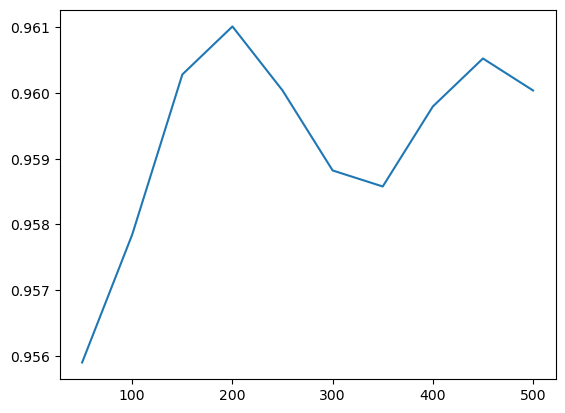

In [130]:
plt.plot(num_trees_s,oob_res_s)

In [131]:
np.argmax(oob_res_s)

3

In [132]:
oob_res_s[3]

0.9610136452241715

In [133]:
num_trees_s[3]

200.0

In [134]:
rf_clf_s = RandomForestClassifier(n_estimators=200,random_state=5).fit(Xs, ys)

In [135]:
print(classification_report(y_test,rf_clf_s.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       886
           1       0.20      0.41      0.27        41

    accuracy                           0.90       927
   macro avg       0.59      0.67      0.61       927
weighted avg       0.94      0.90      0.92       927



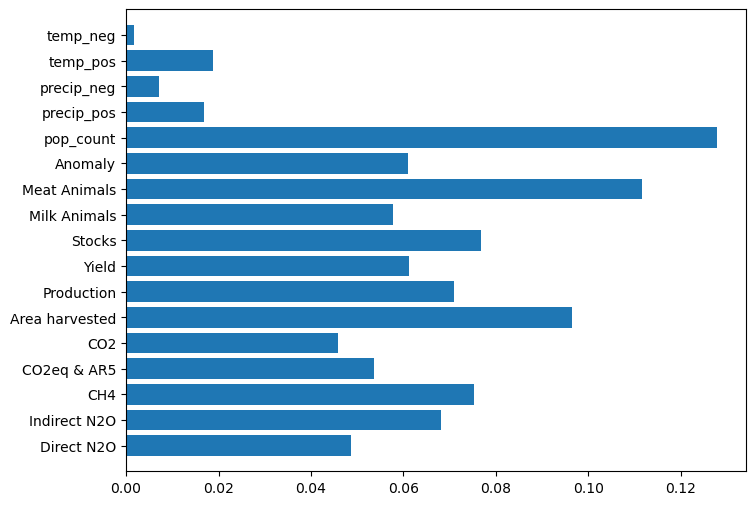

In [136]:
# checking out Feature Importance of our x-variables

plt.figure(figsize=(8,6))
nfeat=X_t.shape[1]
plt.barh(np.arange(nfeat),rf_clf_s.feature_importances_,align='center')
plt.yticks(np.arange(nfeat),list(X_t.columns))
plt.ylim(-1,nfeat)
plt.show()

Population count, area harvested, and meat animals represent the largest share of variation, which fits theory about agriculture's important role in conflict outbreaks between differnet groups. Balancing out the target varaible helped our model performance a little, but performance is still not impressive.

### Random Forest Classifier - balanced y
#### Teleconnected group 
n = 65

In [137]:
num_trees_st = np.linspace(50,500,10)
num_trees_st

array([ 50., 100., 150., 200., 250., 300., 350., 400., 450., 500.])

In [138]:
oob_res_st=[]
for trs in num_trees_st:
    clf_st = RandomForestClassifier(n_estimators=int(trs),oob_score=True,random_state= 5).fit(Xst, yst)
    oob_res_st.append(clf_st.oob_score_)

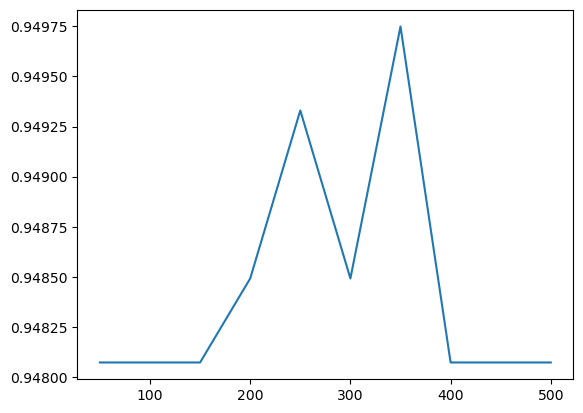

In [139]:
plt.plot(num_trees_st,oob_res_st)

In [140]:
np.argmax(oob_res_st)

6

In [141]:
oob_res_st[6]

0.949748743718593

In [142]:
num_trees_st[6]

350.0

In [143]:
rf_clf_st = RandomForestClassifier(n_estimators=350,random_state=5).fit(Xst, yst)

In [144]:
print(classification_report(y_test_t,rf_clf_st.predict(X_test_scaled_t)))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       522
           1       0.11      0.30      0.16        27

    accuracy                           0.85       549
   macro avg       0.54      0.59      0.54       549
weighted avg       0.92      0.85      0.88       549



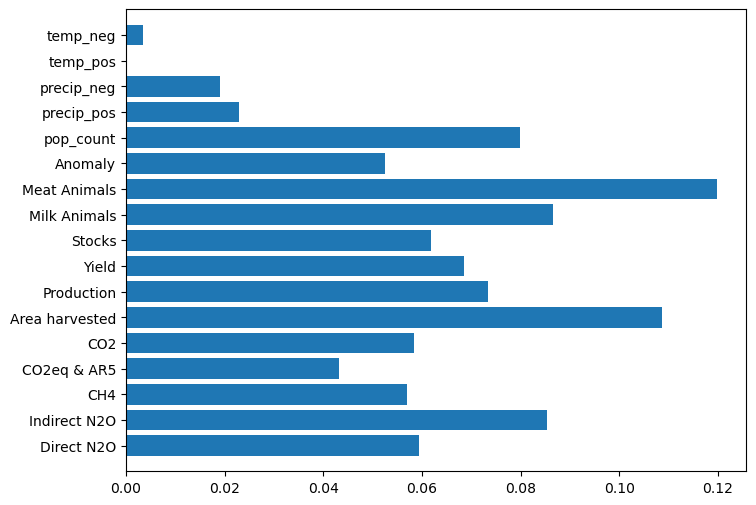

In [145]:
# checking out Feature Importance of our x-variables

plt.figure(figsize=(8,6))
nfeat=X_t.shape[1]
plt.barh(np.arange(nfeat),rf_clf_st.feature_importances_,align='center')
plt.yticks(np.arange(nfeat),list(X_t.columns))
plt.ylim(-1,nfeat)
plt.show()

This model's recall score of is still very low at 11%, but is an improvement on the imbalanced RFC.

We are getting closer to at least being as good as random at predicting conflict incidence!

### Gradient Boosting Classifier - balanced y

#### Full sample

n = 110

In [146]:
gb_clf_s = GradientBoostingClassifier(random_state=5).fit(Xs,ys)

In [147]:
print(classification_report(y_test,gb_clf_s.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.98      0.78      0.87       886
           1       0.12      0.68      0.21        41

    accuracy                           0.77       927
   macro avg       0.55      0.73      0.54       927
weighted avg       0.94      0.77      0.84       927



While recall is getting impressively high here, the over-sampling seems to be true to its name, since all other scores are now falling.

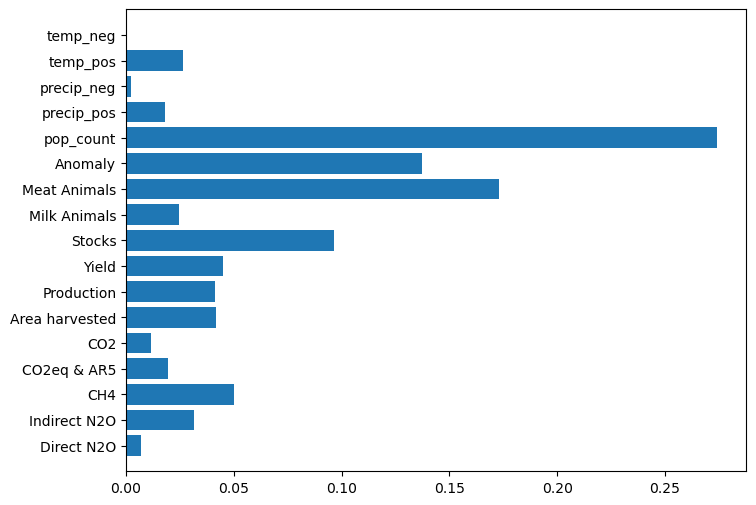

In [148]:
# checking out Feature Importance of our x-variables

plt.figure(figsize=(8,6))
nfeat=X_t.shape[1]
plt.barh(np.arange(nfeat),gb_clf_s.feature_importances_,align='center')
plt.yticks(np.arange(nfeat),list(X_t.columns))
plt.ylim(-1,nfeat)
plt.show()


### Gradient Boosting Classifier - balanced y
#### Teleconnected group

n = 65

In [149]:
gb_clf_st = GradientBoostingClassifier(random_state=5).fit(Xst,yst)

In [150]:
print(classification_report(y_test_t,gb_clf_st.predict(X_test_scaled_t)))

              precision    recall  f1-score   support

           0       0.97      0.64      0.77       522
           1       0.08      0.63      0.15        27

    accuracy                           0.64       549
   macro avg       0.53      0.63      0.46       549
weighted avg       0.93      0.64      0.74       549



A higher recall, again, but significantly lower on all other performance measures.

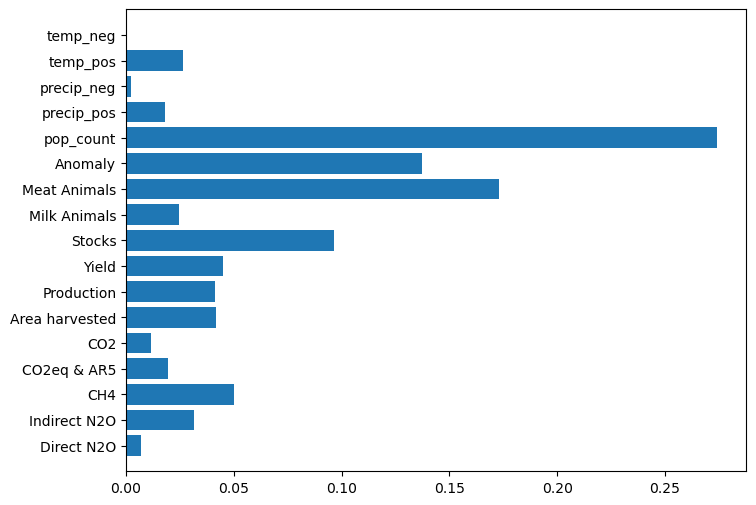

In [151]:
# checking out Feature Importance of our x-variables

plt.figure(figsize=(8,6))
nfeat=X_t.shape[1]
plt.barh(np.arange(nfeat),gb_clf_s.feature_importances_,align='center')
plt.yticks(np.arange(nfeat),list(X_t.columns))
plt.ylim(-1,nfeat)
plt.show()

## Logistic Regression Classifier - balanced y

In [152]:
from sklearn.linear_model import LogisticRegression

In [160]:
lr_clf_Xs = LogisticRegression(random_state=5,penalty='none', max_iter=1000).fit(Xs, ys)

In [161]:
print(lr_clf_Xs.coef_,lr_clf_Xs.intercept_)

[[ 1.3618594  -2.31842931 -3.63521945  4.98114907 -2.57217988  0.75757947
   0.57531789  0.38235833 -1.39286752  0.45165327 -0.80371351  0.34579915
   0.25644259 -0.06127828 -0.08773247  0.14025811 -0.31433336]] [-0.62531005]


In [162]:
print(classification_report(y_test,lr_clf_Xs.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.98      0.70      0.81       886
           1       0.10      0.73      0.18        41

    accuracy                           0.70       927
   macro avg       0.54      0.71      0.50       927
weighted avg       0.94      0.70      0.79       927



# Our best model overall

This model's f1 score is tied for first with our intial Regression Forest, but the recall score of 49% here is by far the best yet.

We are getting closer to at least being as good as random at predicting conflict incidence!

### Random Forest Classifier - balanced y

####  Full sample
n = 110

In [128]:
num_trees_s = np.linspace(50,500,10)
num_trees_s

array([ 50., 100., 150., 200., 250., 300., 350., 400., 450., 500.])

In [129]:
oob_res_s=[]
for trs in num_trees_s:
    clf_s = RandomForestClassifier(n_estimators=int(trs),oob_score=True,random_state= 5).fit(Xs, ys)
    oob_res_s.append(clf_s.oob_score_)

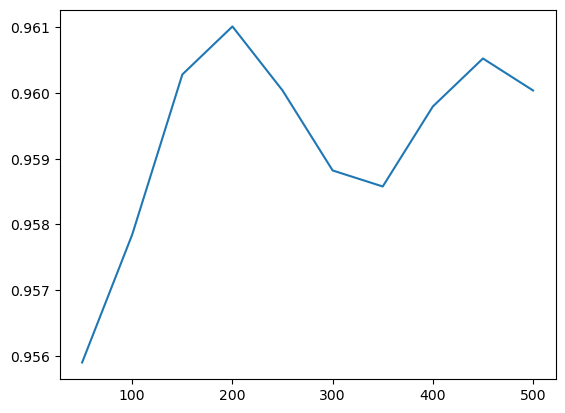

In [130]:
plt.plot(num_trees_s,oob_res_s)

In [131]:
np.argmax(oob_res_s)

3

In [132]:
oob_res_s[3]

0.9610136452241715

In [133]:
num_trees_s[3]

200.0

In [134]:
rf_clf_s = RandomForestClassifier(n_estimators=200,random_state=5).fit(Xs, ys)

In [135]:
print(classification_report(y_test,rf_clf_s.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95       886
           1       0.20      0.41      0.27        41

    accuracy                           0.90       927
   macro avg       0.59      0.67      0.61       927
weighted avg       0.94      0.90      0.92       927



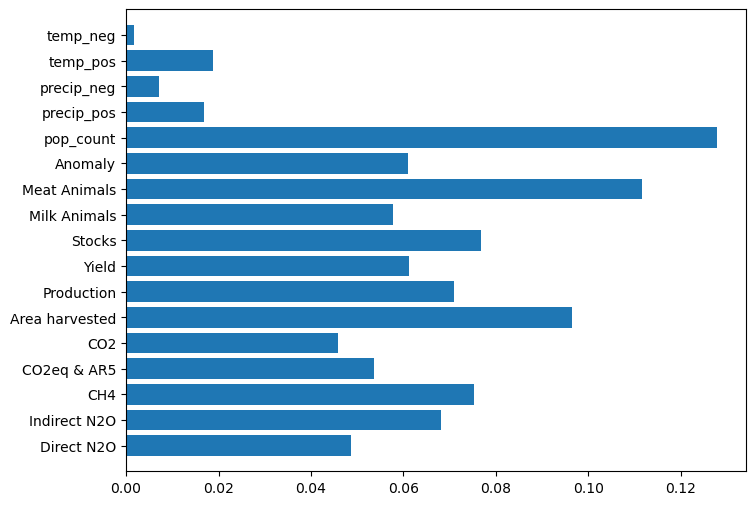

In [136]:
# checking out Feature Importance of our x-variables

plt.figure(figsize=(8,6))
nfeat=X_t.shape[1]
plt.barh(np.arange(nfeat),rf_clf_s.feature_importances_,align='center')
plt.yticks(np.arange(nfeat),list(X_t.columns))
plt.ylim(-1,nfeat)
plt.show()

Population count, area harvested, and meat animals represent the largest share of variation, which fits theory about agriculture's important role in conflict outbreaks between differnet groups. Balancing out the target varaible helped our model performance a little, but performance is still not impressive.

In short, conflict onset is extremely difficult to predict. Our results confirm that teleconnected groups do see a slightly higher prediction power for conflict onset.

See full analysis and conclusion in our readme.

Later iterations of this project use high-dimensional gridded global  data for weather, agricultural indicators, conflict, and the UN Human Development Index using 0.5 x 0.5 degree pixels.